In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
import itertools
from IPython.display import display

plt.rcParams['figure.figsize'] = [14, 8]

In [29]:
base_path = "../aggr_results/"
tests= [
    "multiple_genome_neat",
    "single_genome_es_hyperNEAT",
    "single_genome_deep_hyperNEAT",
    "single_genome_neat_1",
]

col_names = []

dfs = {}
for t in tests: 
    file_name = base_path + t  + ".csv"
    df = pd.read_csv(file_name, sep=';')
    dfs[t] = (df)
    col_names = df.columns[1:]
            
dfs[t].head(2)

,run_1,run_2,run_3,run_4,run_5
0,1.34224,0.84605,1.16511,1.27973,1.07026
1,1.34224,1.27677,1.24978,1.27973,1.26988


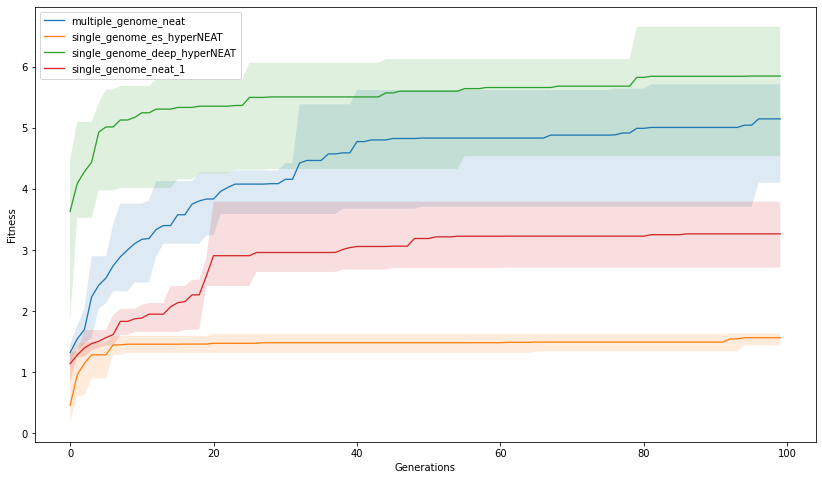

In [49]:
def plot_graphs(dfs, test_names, gen_range):
    for t in test_names:
        test = dfs[t]
        cols = [k for k in test]
        steps = [i for i in range(gen_range[0], gen_range[1])]

        avg_arr = []
        min_arr = []
        max_arr = []

        for row in steps:
            values = []
            for c in cols:
                values.append(test[c][row])
            avg_arr.append(sum(values)/len(values))
            min_arr.append(min(values))
            max_arr.append(max(values))

        plt.plot(steps, avg_arr, lw =1.3, label=t)
        plt.fill_between(steps, min_arr,max_arr, alpha = 0.15)

        
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.legend(loc="upper left")
    plt.show()
plot_graphs(dfs, tests, [0, 100])